In [1]:
"""
Author: Anuradha wadekar
Title:Amazon Project Sale Analysis
Data Source: https://www.kaggle.com/datasets/edusanketdk/electronics
"""

'\nAuthor: Anuradha wadekar\nTitle:Amazon Project Sale Analysis\nData Source: https://www.kaggle.com/datasets/edusanketdk/electronics\n'

In [12]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [13]:
# Importing the Data
dataset = pd.read_csv('C:/Python/Python39/Scripts/PythonProjects/1 Amazon-Product-Sale-Analysis/DataSet/electronics.csv')


In [6]:
dataset.shape

(1292954, 10)

In [7]:
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [8]:
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [14]:
#Converting data types
dataset['brand'] = dataset['brand'].astype(str)
dataset['category'] = dataset['category'].astype(str)
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset['rating'] = dataset['rating'].astype(float)
dataset['user_id'] = dataset['user_id'].astype(str)
dataset['item_id'] = dataset['item_id'].astype(str)
#dataset['month'] = dataset['month'].astype(int)

print(dataset['brand'])
#print(dataset['category'])
#print(dataset["timestamp"])
#print(dataset["rating"])
#print(dataset['user_id'])
#print(dataset['item_id'])
#print(dataset['month'])

0                 nan
1                 nan
2                 nan
3                 nan
4                 nan
              ...    
1292949    Etre Jeune
1292950           nan
1292951           nan
1292952           nan
1292953    Etre Jeune
Name: brand, Length: 1292954, dtype: object


In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   item_id     1292954 non-null  object        
 1   user_id     1292954 non-null  object        
 2   rating      1292954 non-null  float64       
 3   timestamp   1292954 non-null  datetime64[ns]
 4   model_attr  1292954 non-null  object        
 5   category    1292954 non-null  object        
 6   brand       1292954 non-null  object        
 7   year        1292954 non-null  int64         
 8   user_attr   174124 non-null   object        
 9   split       1292954 non-null  int64         
 10  month       1292954 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 108.5+ MB


In [100]:
dataset.describe()

,rating,year,split,month
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01,6.340661e+00
std,1.379732e+00,2.643513e+00,5.506810e-01,3.576262e+00
min,1.000000e+00,1.999000e+03,0.000000e+00,1.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00,3.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00,6.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00,9.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00,1.200000e+01


In [101]:
# We can also see the number of unique users and items in the dataset.
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
month              12
dtype: int64

In [102]:
# check for duplicates

dataset.duplicated().sum()

0

In [103]:
# check for missing values

dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
month               0
dtype: int64

dataset.nunique()

In [13]:
print(dataset.rating)

0          5.0
1          5.0
2          3.0
3          1.0
4          2.0
          ... 
1292949    1.0
1292950    5.0
1292951    3.0
1292952    5.0
1292953    1.0
Name: rating, Length: 1292954, dtype: float64


In [15]:
# the distribution of ratings

dataset['rating'].value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [16]:
# what was the best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: year, dtype: int64

In [17]:
# what was the best month of sales

dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: month, dtype: int64

In [18]:
# drop all null values

dataset.dropna(inplace=True)

# check for missing values

dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

In [108]:
# drop all duplicate values in rating category

#dataset.rating.dropna(inplace=True)
#dataset.rating.drop_duplicates(inplace=True)

In [134]:
print(dataset)

        item_id  user_id  rating  timestamp model_attr  \
28            0       28     2.0 1999-12-01     Female   
81            3       81     5.0 2000-03-31     Female   
131           7      131     4.0 2000-06-15     Female   
139           3      139     3.0 2000-06-29     Female   
178           8      178     1.0 2000-10-19     Female   
...         ...      ...     ...        ...        ...   
1292874    9125  1157555     3.0 2018-09-05     Female   
1292876    9217  1157557     5.0 2018-09-05       Male   
1292909    9205  1157590     5.0 2018-09-14       Male   
1292941    9263  1157621     5.0 2018-09-24       Male   
1292953    9478  1157632     1.0 2018-10-01     Female   

                       category       brand  year user_attr  split  month  
28       Portable Audio & Video         nan  1999    Female      0     12  
81               Camera & Photo         nan  2000      Male      0      3  
131                  Home Audio     Philips  2000      Male      0      6  

Text(0, 0.5, 'Number of Customers')

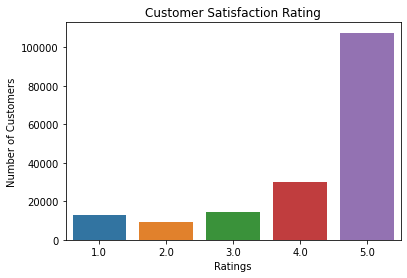

In [135]:
# the distribution of ratings 

c=sns.countplot(x='rating', data=dataset )

c.set_title('Customer Satisfaction Rating')
c.set_xlabel('Ratings')
c.set_ylabel('Number of Customers')


In [22]:
dataset['rating'].value_counts()

5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: rating, dtype: int64

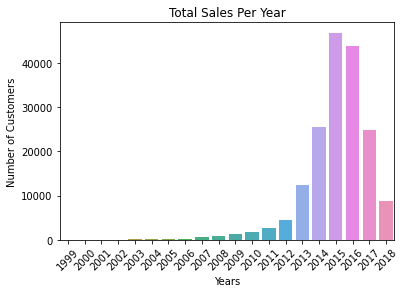

<Figure size 2160x2160 with 0 Axes>

In [25]:
# what was the best year of sales

plt.figure(1)

#dataset.groupby('year')['rating'].count().plot(kind='bar')
sns.countplot(x='year', data=dataset)

plt.title('Total Sales Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45) #plt.gcf().autofmt_xdate() 
plt.figure(figsize=(30, 30))

plt.show()


In [158]:
dataset.dropna(inplace=True)

print(dataset)

        item_id  user_id  rating  timestamp model_attr  \
28            0       28     2.0 1999-12-01     Female   
81            3       81     5.0 2000-03-31     Female   
131           7      131     4.0 2000-06-15     Female   
139           3      139     3.0 2000-06-29     Female   
178           8      178     1.0 2000-10-19     Female   
...         ...      ...     ...        ...        ...   
1292874    9125  1157555     3.0 2018-09-05     Female   
1292876    9217  1157557     5.0 2018-09-05       Male   
1292909    9205  1157590     5.0 2018-09-14       Male   
1292941    9263  1157621     5.0 2018-09-24       Male   
1292953    9478  1157632     1.0 2018-10-01     Female   

                       category       brand  year user_attr  split  month  
28       Portable Audio & Video         nan  1999    Female      0     12  
81               Camera & Photo         nan  2000      Male      0      3  
131                  Home Audio     Philips  2000      Male      0      6  

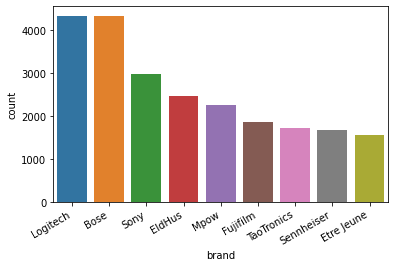

In [26]:
# brands with the most sales
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)
plt.gcf().autofmt_xdate() 

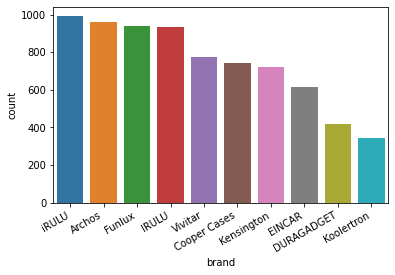

In [6]:
# What brand name sold the least?

sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)

plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)

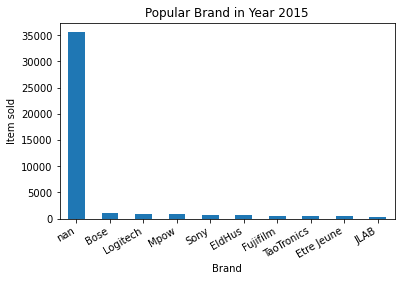

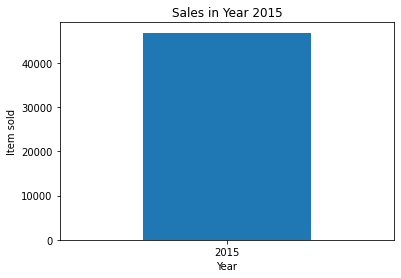

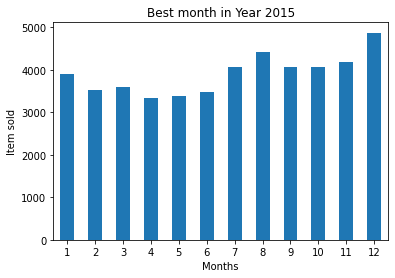

In [33]:

dataset_2015 = dataset[dataset['year'] == 2015]

plt.figure(1)
dataset_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Popular Brand in Year 2015')
plt.xlabel('Brand')
plt.ylabel('Item sold')
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)  
plt.show()

plt.figure(2)
dataset_2015.groupby('year')['rating'].count().plot(kind='bar')
plt.title('Sales in Year 2015')
plt.xlabel('Year')
plt.ylabel('Item sold')
plt.xticks(rotation=0) #plt.gcf().autofmt_xdate() 
plt.show()

plt.figure(3)
dataset_2015.groupby('month')['rating'].count().plot(kind='bar')
plt.title('Best month in Year 2015')
plt.xlabel('Months')
plt.ylabel('Item sold')
plt.xticks(rotation=0) #plt.gcf().autofmt_xdate() 
plt.show()


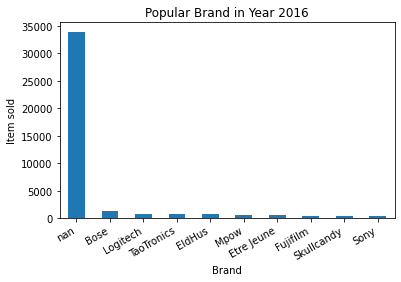

In [101]:
# what product sold the most in 2016

dataset_2016 = dataset[dataset['year'] == 2016]

dataset_2016.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

plt.title('Popular Brand in Year 2016')
plt.xlabel('Brand')
plt.ylabel('Item sold')
plt.gcf().autofmt_xdate() #plt.xticks(rotation=0)
plt.show()


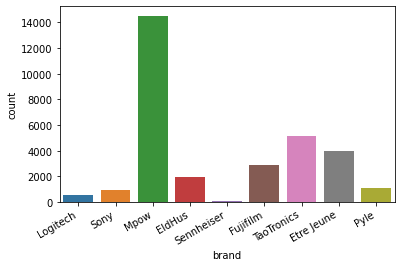

In [7]:
# brands with the most sales in 2015

sns.countplot(x='brand', data=dataset[dataset['year'] == 2015], order=dataset['brand'].value_counts().iloc[1:10].index)
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)

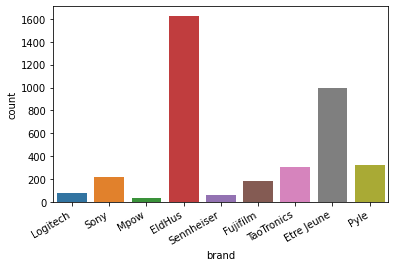

In [8]:
# brands with the most sales in 2016

sns.countplot(x='brand', data=dataset[dataset['year'] == 2016], order=dataset['brand'].value_counts().iloc[1:10].index)
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)

<AxesSubplot:xlabel='month', ylabel='count'>

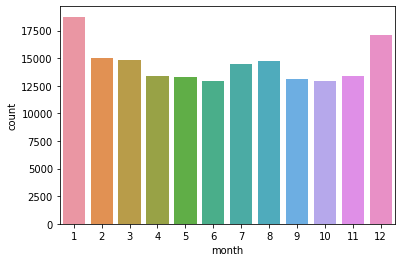

In [35]:
# month with most sales

sns.countplot(x='month', data=dataset)

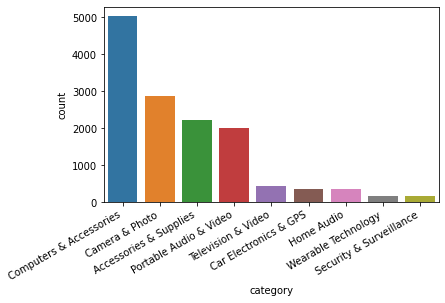

In [36]:
# What products by category were sold the most in January

sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:10].index)
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)

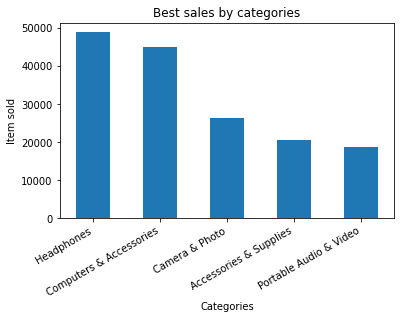

In [37]:
# Best sales by categories

dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Best sales by categories')
plt.xlabel('Categories')
plt.ylabel('Item sold')
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)
plt.show()

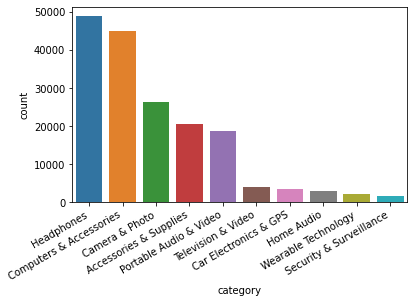

In [38]:
# Best sales Category

sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[0:10].index)
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)

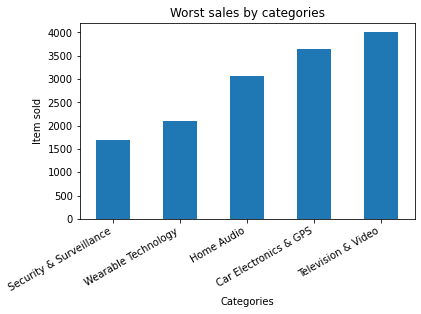

In [39]:
# Worst sales by categories

dataset.groupby('category')['rating'].count().sort_values(ascending=True).head(5).plot(kind='bar')
plt.title('Worst sales by categories')
plt.xlabel('Categories')
plt.ylabel('Item sold')
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)
plt.show()

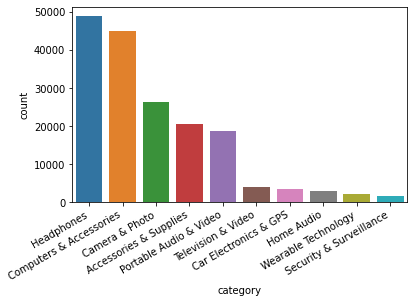

In [40]:
# Category with the least sales

sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index)
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)

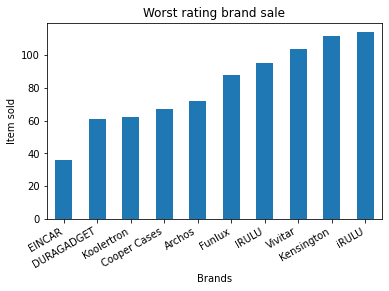

In [42]:
# worst brands by rating

dataset.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')
plt.title('Worst rating brand sale')
plt.xlabel('Brands')
plt.ylabel('Item sold')
plt.gcf().autofmt_xdate() #plt.xticks(rotation=45)
plt.show()

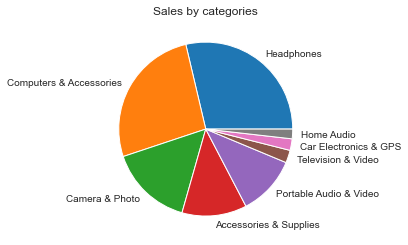

In [182]:
# Categories sale percentage!

dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(8).plot(kind='pie')
plt.title('Sales by categories')
plt.xlabel('')
plt.ylabel('')
sns.set_style('white')
plt.show()

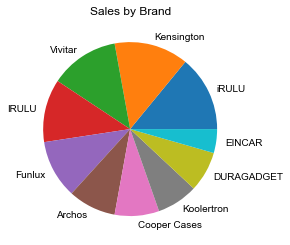

In [181]:
# Brands sale percentage!

dataset.groupby('brand')['rating'].count().sort_values(ascending=False).iloc[-10:].plot(kind='pie')
plt.title('Sales by Brand')
plt.xlabel('')
plt.ylabel('')
sns.set_style('white')
plt.show()